Fundamentals of Machine Learning 
# Assignment #1

Prompt:
Make a Notebook with the following elements. Please add sufficient comments: not just explaining what you are doing, but why you are doing it.
#1 Your data pre-processing steps
#2 The head() of the resulting data frame
#3 A plot of a time series of your choice, e.g. mean steps per day over all participants
#4 An analysis of one quantitative variable (e.g. mean steps per participant), including:
            - 2 graphs of the distribution (e.g., histogram, box plot, density plot, violin plot)
            - Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
            - Verbal description of the distribution, including an investigation into its normality, skewness, outliers, etc

# Merge two files' data
## Pre-processing steps and head()

In [12]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 

df1 = pd.read_csv('steps.csv', sep = ";" ) #reformat the dataframe with the correct seperators
df1.head() #output of the rows

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2 = pd.read_csv('survey.csv')
df2.head() #output of the rows

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [14]:
df = pd.merge(df2, df1, on = 'id') #'id' is the common identifier - merge two files
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


Filter out unrealistic data:

In [37]:
# filter out unrealistic data based on the observation of the original csv file
def impossible_data(x):
    if(40> x > 200.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(impossible_data)


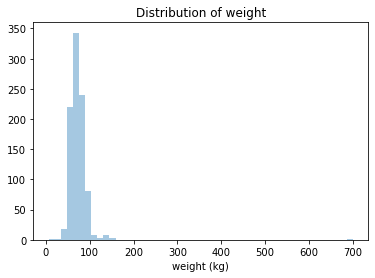

In [38]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Distribution of weight')
plt.xlabel('weight (kg)')
plt.show()

# Analyzing a quantitative variable
## Plot

In [28]:
df = pd.merge(df2, df1, on = 'id') #'id' is the common identifier - merge two files
mean_steps = df.loc[:,"20-5-2013":"20-6-2013"].mean() #get the mean over the columns (all the dates) and store
mean_steps.index #the indexes now contain the dates

KeyError: '20-5-2013'

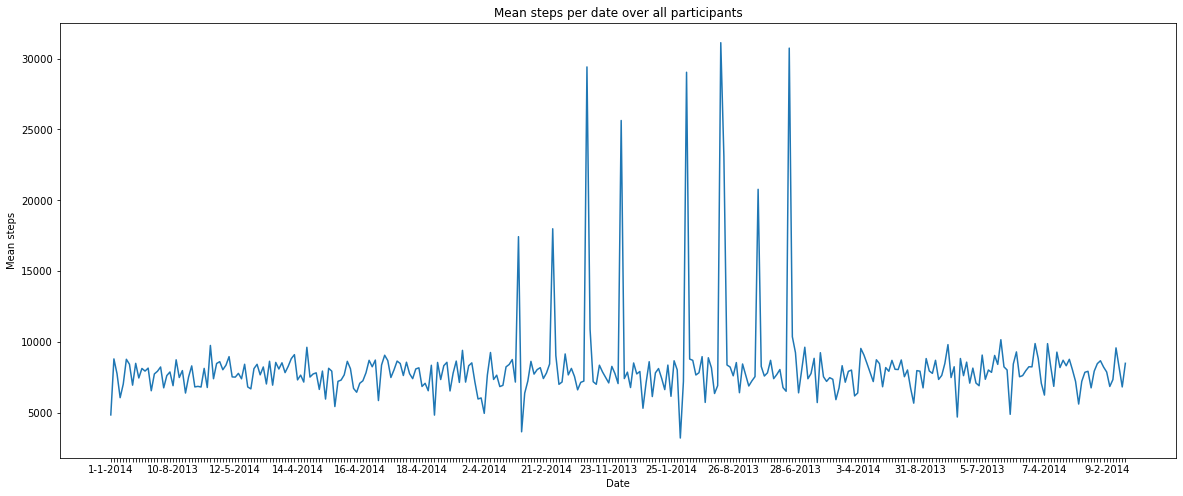

In [35]:
plt.figure(figsize=(20, 8)) #set the figure ("canvas") size
plot = sns.lineplot(x=mean_steps.index, y=mean_steps) #create the plot

#Now a tricky part. If we plot all the dates, they overlap. So we need to make some ticks invisible. 

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Mean steps per date over all participants") #set the title
plt.xlabel("Date") #set the x-label
plt.ylabel("Mean steps") #set the y-label

plt.show() #show the plot